<a href="https://colab.research.google.com/github/potulabe/symphonypy/blob/main/notebooks/Symphonypy_precomputed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Symphonypy usage with pre-computed references

In [ ]:
!pip install symphonypy

In [1]:
import symphonypy as sp
import scanpy as sc

sc.set_figure_params(dpi=150)

List of available datasets (description is [here](https://zenodo.org/record/7568342#.Y9FTIC8w1qs)):
1. `sp.datasets.pbmcs_10x_reference()`,
2. `sp.datasets.pancreatic_atlas()`,
3. `sp.datasets.fetal_liver()`,
4. `sp.datasets.kidney()`,
5. `sp.datasets.t_cells()`,
6. `sp.datasets.inflammatory_atlas()`,
7. `sp.datasets.TMS()`.

  0%|          | 0.00/22.9M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


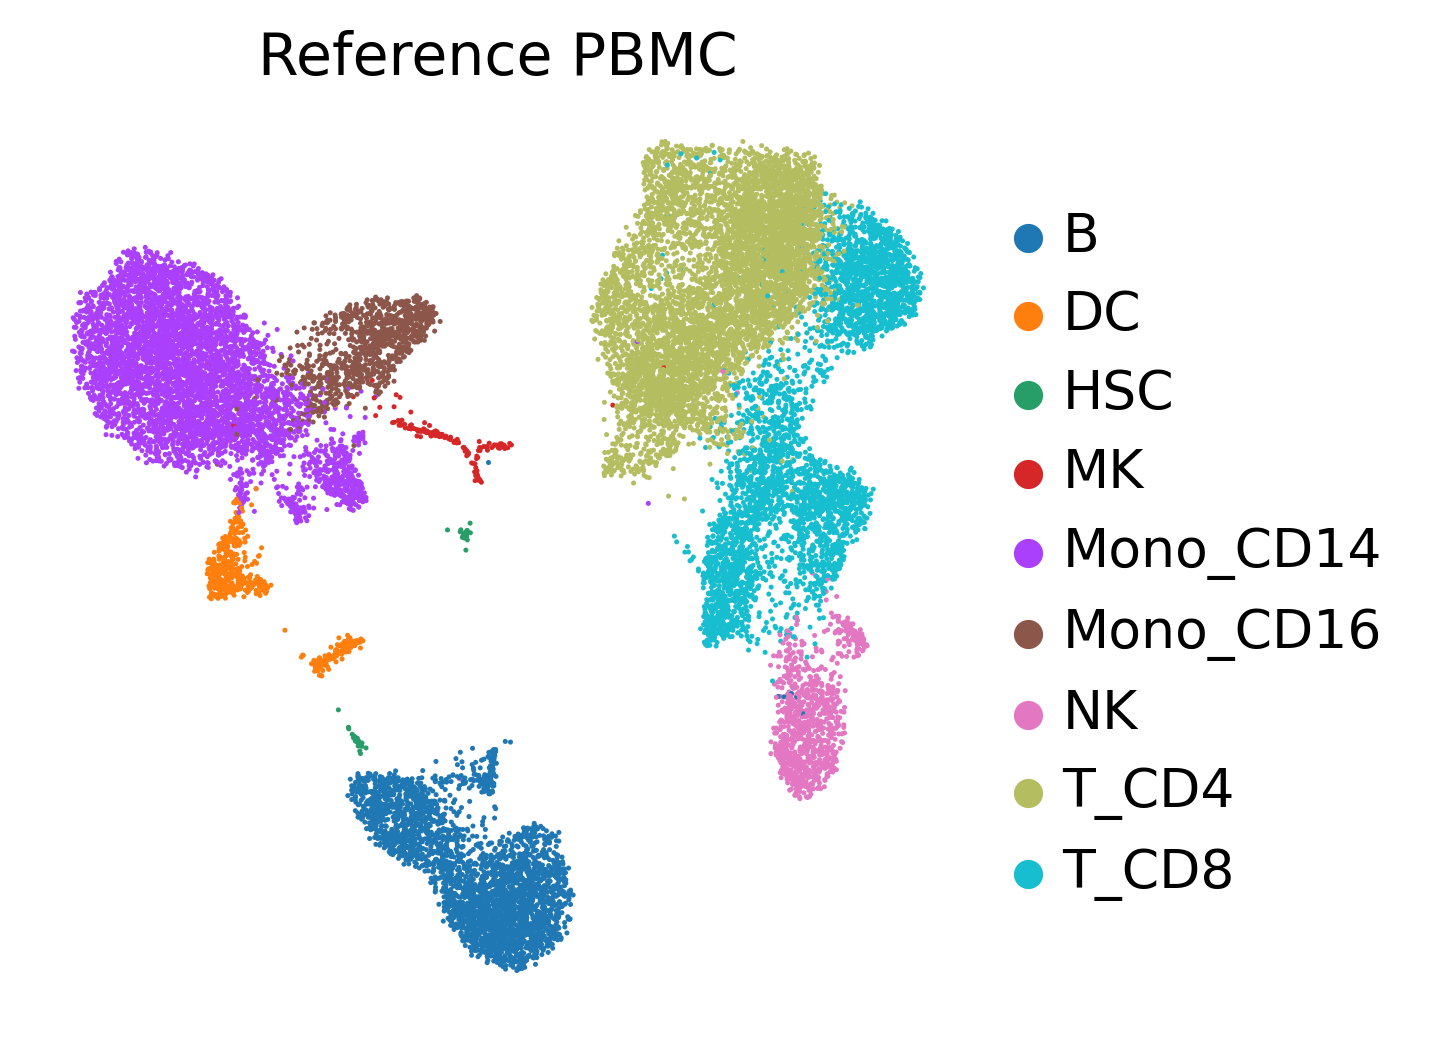

In [2]:
adata_ref = sp.datasets.pbmcs_10x_reference()
sc.pl.umap(
    adata_ref,
    color="cell_type",
    frameon=False,
    title="Reference PBMC",
)

Before Symphony label transfer query dataset should be log1p-normalized.

In [3]:
adata_query = sc.datasets.pbmc3k()

# Query preprocessing
sc.pp.normalize_total(adata_query, target_sum=1e4)
# target_sum=1e4 is prefered if you use pre-built references
sc.pp.log1p(adata_query)

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

In [4]:
# Mapping Harmony coordinates
sp.tl.map_embedding(adata_query, adata_ref)

# Mapping UMAP coordinates
sp.tl.ingest(adata_query, adata_ref)

# Labels prediction
sp.tl.transfer_labels_kNN(adata_query, adata_ref, "cell_type")

Results visualization.

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<AxesSubplot: title={'center': 'Reference dataset'}, xlabel='UMAP1', ylabel='UMAP2'>

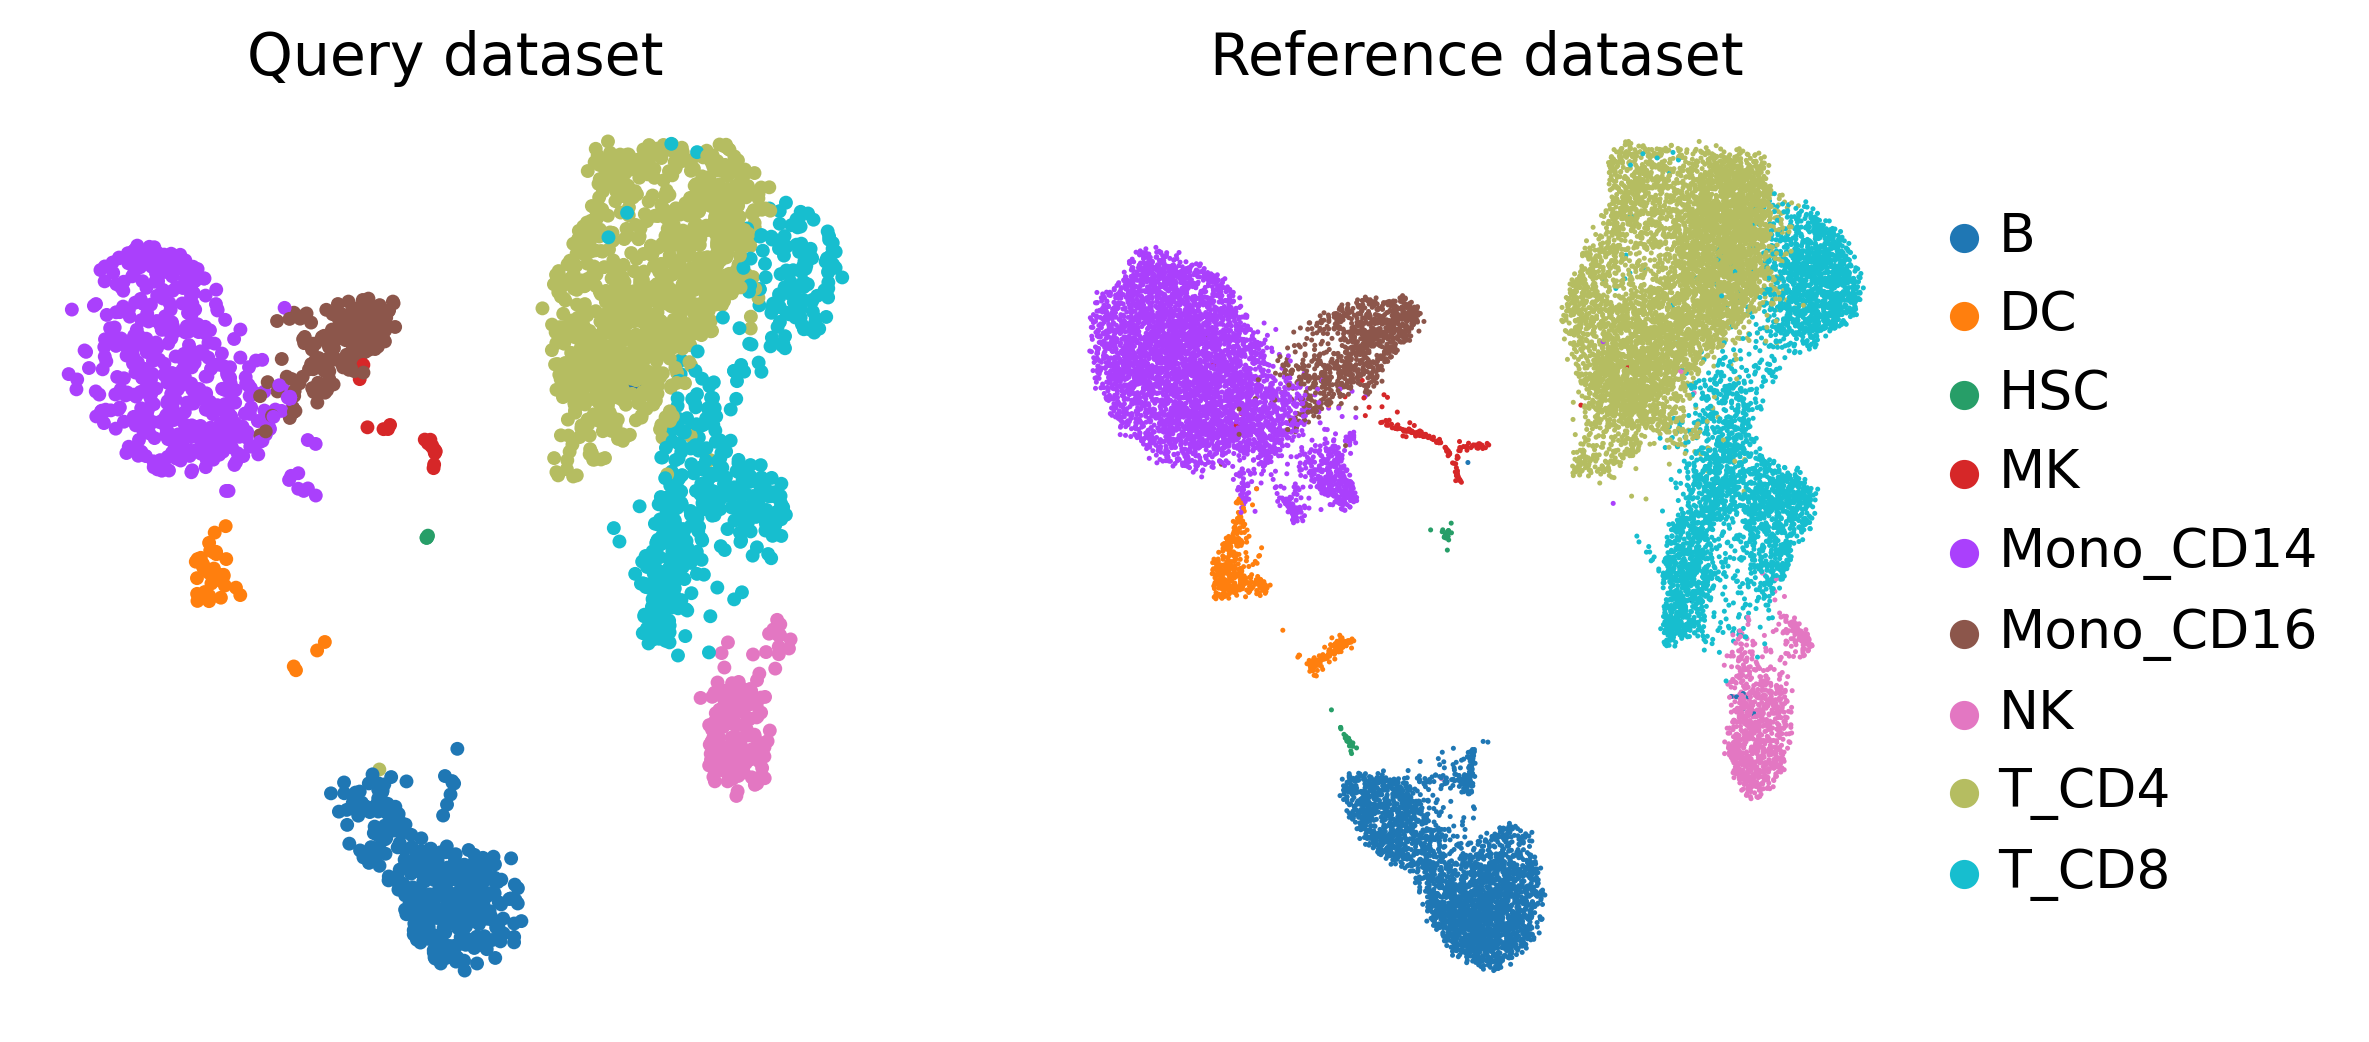

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(8, 4), ncols=2)

adata_query.obs["cell_type"] = adata_query.obs["cell_type"].astype("category")
adata_query.uns["cell_type_colors"] = [dict(zip(
    adata_ref.obs["cell_type"].cat.categories,
    adata_ref.uns["cell_type_colors"],
))[ct] for ct in adata_query.obs["cell_type"].cat.categories]

sc.pl.umap(
    adata_query,
    color="cell_type",
    frameon=False,
    title="Query dataset",
    ax=axes[0],
    show=False,
    legend_loc=None,
)

sc.pl.umap(
    adata_ref,
    color="cell_type",
    frameon=False,
    title="Reference dataset",
    ax=axes[1],
    show=False,
)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


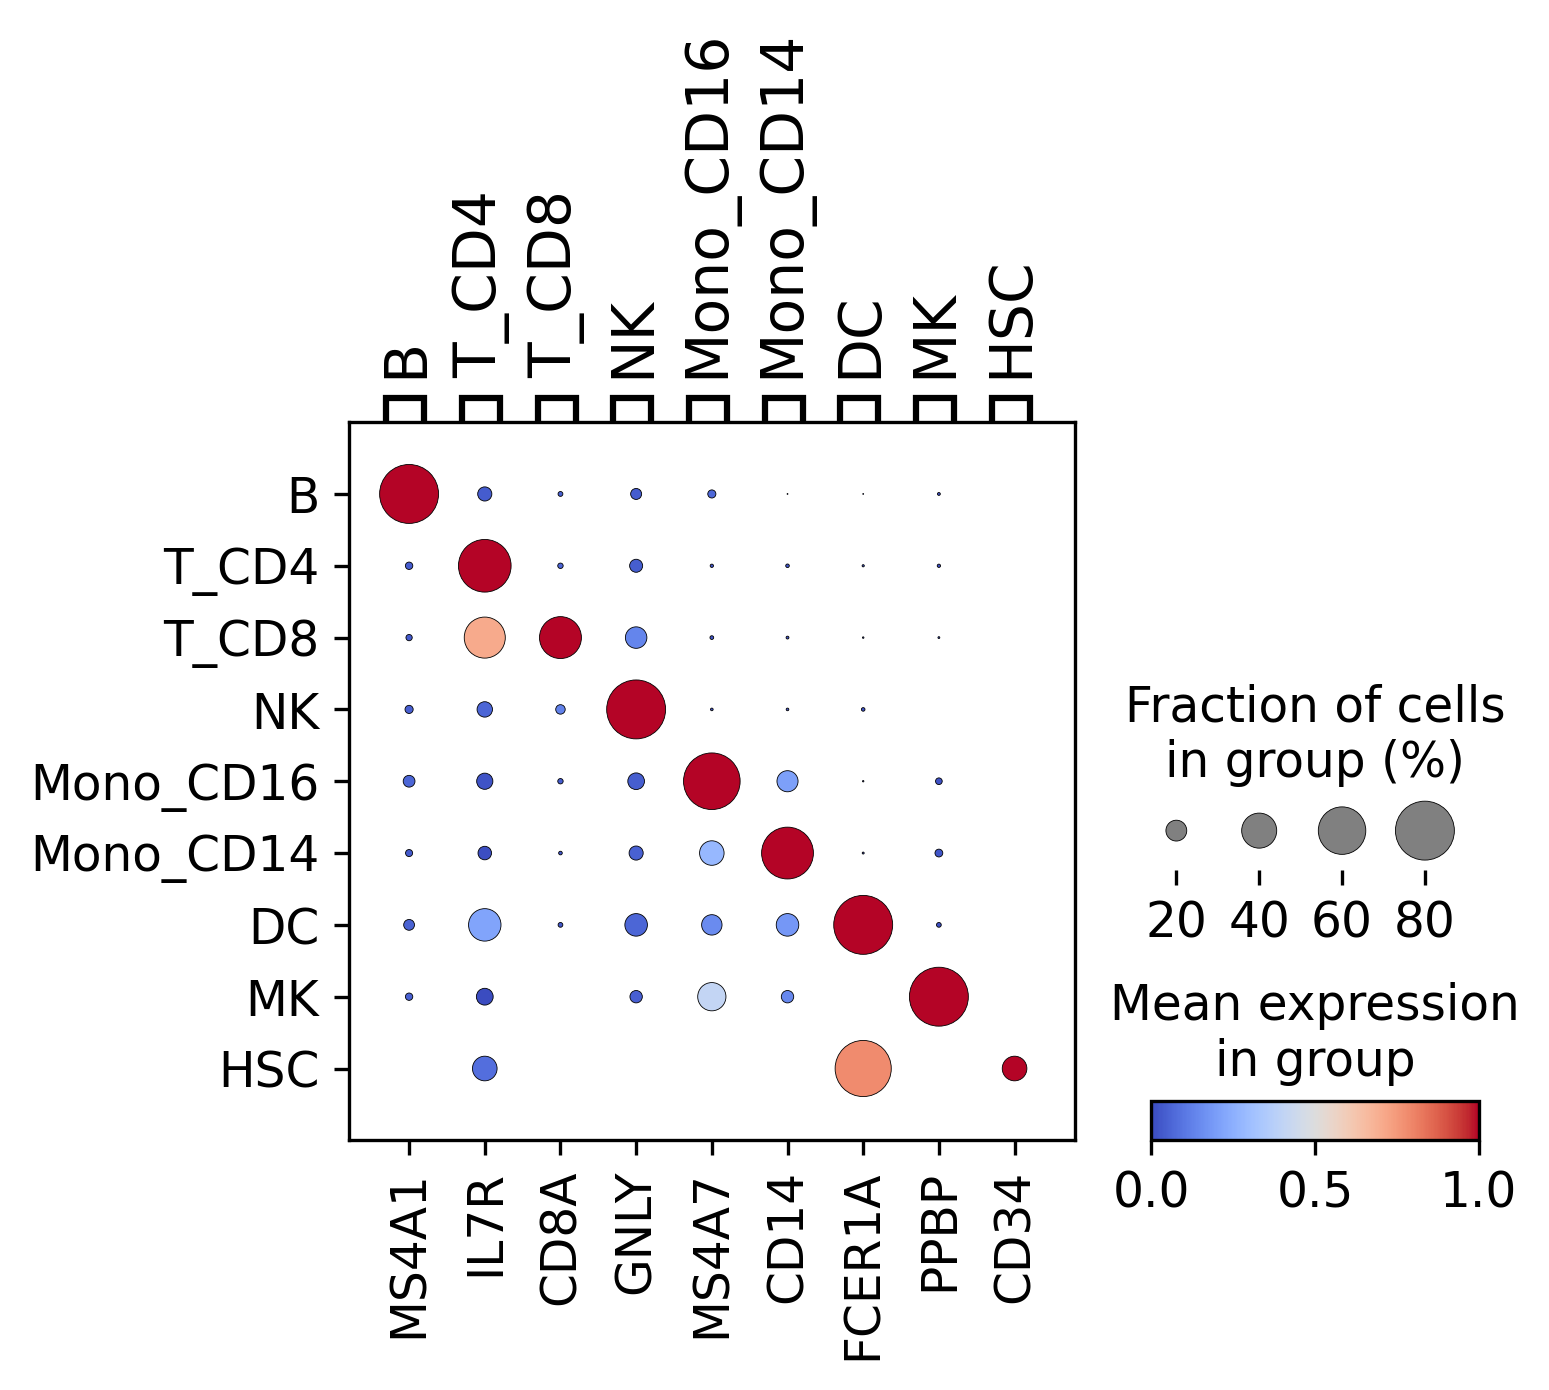

In [14]:
marker_genes = {
    "B": ["MS4A1"],
    "T_CD4": ["IL7R"],
    "T_CD8": ["CD8A"],
    "NK": ["GNLY"],
    "Mono_CD16": ["MS4A7"],
    "Mono_CD14": ["CD14"],
    "DC": ["FCER1A"],
    "MK": ["PPBP"],
    "HSC": ["CD34"],
}

adata_query.obs["cell_type"] = (
    adata_query.
    obs["cell_type"].
    cat.
    reorder_categories(
        list(marker_genes.keys())
    )
)

sc.pl.dotplot(
    adata_query,
    var_names=marker_genes,
    groupby="cell_type",
    standard_scale="var",
    dot_max=0.8,
    cmap="coolwarm",
)